<a href="https://colab.research.google.com/github/oscar-defelice/TimeSeries-lectures/blob/development/08.TimeSeries-Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Analysis and Forecasting

This is a series of notebooks to support lectures on _Time series analysis and forecast_.

![](https://user-images.githubusercontent.com/49638680/154160268-cf39a1ec-3557-4940-8853-d06fc7a79acf.png)

## Time series Forecast and Classification

In paticular, over this notebook we are going to use a Recurrent Neural Network architecture with _Attention Mechanism_ in order to implement a classifier of values associated to several time series, that will play the role of features.

### Some references

1. [Bahdanau Attention Mechanism](https://arxiv.org/abs/1409.0473)
2. [Transformer Architecture](https://arxiv.org/abs/1706.03762)
3. [Adversarial Sparse Transformer for Time Series Forecasting](https://proceedings.neurips.cc/paper/2020/file/c6b8c8d762da15fa8dbbdfb6baf9e260-Paper.pdf)
4. [Deep Transformer Models for Time Series Forecasting: The Influenza Prevalence Case](https://arxiv.org/abs/2001.08317)
5. [The Time Series Transformer](https://towardsdatascience.com/the-time-series-transformer-2a521a0efad3)
6. [Transformers for Time-series Forecasting](https://medium.com/mlearning-ai/transformer-implementation-for-time-series-forecasting-a9db2db5c820)

# Bahdanau Attention Mechanism

Consider a simple encoder-decoder newtork. This model is based on the one described in the [2014 `Seq2Seq` paper by Ilya Sutskever, Oriol Vinyals and Quoc V. Le](https://research.google/pubs/pub43155/).

![Image by the author](https://user-images.githubusercontent.com/49638680/156374648-1759a98c-34d2-418a-8b71-0254ca1c87ea.png)

The idea is to convert an _input sequence_ - in our case a time series, but it can be a sentence to be translated (as in the paper) - into an hidden latent vector and then use this as input for the decoder part and get the _output sequence_. Again, the output sequence can be a time series forecast or the translated sentence into another language, for instance.
For the sake of clarity and to avoid confusion, in the following we are going to refer only to _sequences_ having in mind they can be time series, texts, audio tracks, etc.

To schematise:

* __Encoder__: Such part of the network takes the input sequence and convert it into a fixed-length (_i.e._ the latent space dimension) encoding vector.

* __Decoder__: Such part of the network takes the encoding vector and convert it into a variable-length output sequence.

In principle there is no prescription about the kind of cells Encoder and Decoder network should be composed of, however, usually these are LSTM or GRU to avoid vanishing/exploding gradients.

## Bottleneck of information

The great point of strength of such a system is the conversion of the input sequence into a latent space vector. This allows to put information in a form a computer can handle easily and also to give importance only to the relevant parts of the sequence. However, this is also one of the gratest weaknesses (along with the computational efficiency) of such an architecture.

Indeed, the latent space has a _fixed dimension_, meaning that a long sequence will produce the very same amount of information than a shorter one. This would eventually cause what is called _bottleneck of information_, that is possibly only a certain amount of information is transmitted to the decoder.

![](https://user-images.githubusercontent.com/49638680/156526457-5411e2cf-c968-4001-a66e-f666b12072d7.png)

One solution would be to pass all the hidden states (not only the final one) from the encoder and average them. This of course is not a good idea, since we will lose context information and we would use a large amount of memory.

A better solution is to select which hidden states contribute the most at the output. This is precisely what the _Attention mechanism_ pursues.

## The Attention Layer

Roughly speaking, it is a weighted sum, whose weights are _learnt_. This makes the _Attention layer_ a trainable layer.

![](https://user-images.githubusercontent.com/49638680/156533074-8fd5df79-1337-4ee8-8445-2b8ec696b29c.png)

# Transformer Architecture: Queries, Keys, Values

Inspired to efficient research techniques in databases, we can define the _attention score_ as a similarity between two vectors (_queries_ and _keys_).

The famous formula is

$$\mathcal{A} = \mathrm{softmax}\left(\dfrac{QK^T}{\sqrt{d_K}}\right) V \, .$$

_Note_: this kind of attention is really easy to compute (it is really just matrix multiplication), but this means the embedding vectors need to be learnt elsewhere.

We are going to explore how this is the basic ingredient of _Transformer architecture_.

## Transformer Architecture

The main idea is to create a _model_ recognising self-patterns, _e.g._ in NLP you want to have high weights in embeddings dot-products of tokens referring to the same property.

The two main ingredients of transformer architecture are

1. Self-Attention
2. Multi-Head Attention

### Self-Attention

The aim is to create a vector representation (self-attention) for each element of the sequence.

We can denote such vectors as

$$A^{<t>}(q, k, v)\, .$$

The great advantage is that we can take into account the _context_ that is the other points in the sequence affecting the value of the one we are analysing.

**Attention weights**: the vector components can be represented as follows:

$$ A^{<t>}(q, k, v) = \sum_i \frac{\exp(q\cdot k^{<i>}}{\sum_j \exp(q \cdot k^{<j>})} v^{<i>} \, .$$

In other words, we are saying that for each sequence element $<t>$ we have $3$ objects:
* $q^{<t>} = W_q x^{<t>}$ query
* $k^{<t>} = W_k x^{<t>}$ key
* $v^{<t>} = W_v x^{<t>}$ value

These are all functions of the word embedding vectors and are the inputs used to calculate attention vector $A^{<t>}$.

The formula we wrote above for $\mathcal{A}$ is the vectorised version of $A^{<t>}$ for all $<t>$.

### Multi-Head Attention

The idea now is to repeat the calculation for the self-attention in order to get an adapted vector representation for different _queries_.

As an intuition, infact, you can think of $q$ as a "_question_" about the precise dependence of an element of the sequence with respect to another. _E.g._ We can say that in a time series a certain periodical region of data will manifest a decreasing rate because of seasonality, and gets an higher attention score for the $q$ related to the periodic behaviour of the series. If we look at a query modelling the trend, we may hope that the peaks of the time series would get an higher attention score.

The idea is to perform a for-loop over the "heads" in order to achieve a richer and more complete representation of sequences, adn also to get a much higher numerical performance.

![](https://user-images.githubusercontent.com/49638680/156577344-6d2914b8-f456-4f1e-9dd1-0a31d62b2ace.png)


## A nice reference

I strongly advice to have a look at [this nice post](https://towardsdatascience.com/illustrated-self-attention-2d627e33b20a#570c) plenty of well exposed ideas and of wonderful illustrations.

# Time series with attention models

For these kinds of tasks, a pretty straightforward procedure would be to use an autoregressive model of some kind (like *ARIMA*, *ARMAX*); these models allow us to take into account autocorrelations in a time series, and also can accept the deterministic features in the future (typically called “exogenous variables”). One limitation of ARMAX is that it is a linear model, and also one needs to specify the order of autocorrelations to be taken into account parametrically. 
Attention models, instead, can learn nonlinear patterns, and are able to take into account autocorrelations in a nonparametric way, focusing on the most important contributions.

Furthermore, Attention model allows us to take into account longer sequences avoind the information bottleneck problem and focusing on the most relevant part of the past in order to forecast the future behaviour of the time series.

In [1]:
# Load libraries
import tensorflow as tf

import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = "retina"
sns.set()

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


# Importing data and building dataset

Let’s start with a practical example of a time series and look at the [FordA dataset from the UCR/UEA archive.](https://www.cs.ucr.edu/~eamonn/time_series_data_2018/). 

The dataset we are using here is called FordA. The data comes from the UCR archive. The dataset contains $3601$ training instances and another $1320$ testing instances. 
Each timeseries corresponds to a measurement of engine noise captured by a motor sensor. 

An example task, woud be the automatic detection of the presence of a specific issue with the engine. The problem is a balanced binary classification task. The full description of this dataset can be found [here](http://www.j-wichard.de/publications/FordPaper.pdf).

In [2]:
def readucr(filename):
    data = np.loadtxt(filename, delimiter="\t")
    y = data[:, 0]
    x = data[:, 1:]
    return x, y.astype(int)


root_url = "https://raw.githubusercontent.com/hfawaz/cd-diagram/master/FordA/"

x_train, y_train = readucr(root_url + "FordA_TRAIN.tsv")
x_test, y_test = readucr(root_url + "FordA_TEST.tsv")

x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

n_classes = len(np.unique(y_train))

idx = np.random.permutation(len(x_train))
x_train = x_train[idx]
y_train = y_train[idx]

# In the dataset engines with issues are labeled with 1
# the ones without issues with -1, we transform these into 0. 
y_train[y_train == -1] = 0 
y_test[y_test == -1] = 0

#### Goal
> detect whether an engine has an issue, analysing its noise time series. 

For the sake of simplicity, let’s skip a lot of data cleaning/feature engineering steps one could apply to this dataset. 

#### Exercise

Make a simple analysis on this dataset. Try to decompose the time series and see whether there is a recurrent behaviour in anomalous engines.

## Build the model

We are ready to build the model based on the attention mechanism.

Our model processes a tensor of shape `(batch size, sequence_length, features)`, where `sequence_length` is the number of time steps and features is each input time series.

We are going to build an Attention Layer, _i.e._ a tensorflow layer object. This is done for the sake of compatibility.
Indeed, in the models we built previously, you can replace your classification RNN layers with this one: the inputs are fully compatible!

In [3]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0.2):
    # Normalization and Attention
    x = tf.keras.layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = tf.keras.layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = tf.keras.layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = tf.keras.layers.LayerNormalization(epsilon=1e-6)(res)
    x = tf.keras.layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = tf.keras.layers.Dropout(dropout)(x)
    x = tf.keras.layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

The main part of our model is now complete. 

We can stack multiple of those `transformer_encode`r blocks and we can also proceed to add the final _Multi-Layer Perceptron_ classification head. 
Apart from a stack of Dense layers, we need to reduce the output tensor of the `TransformerEncoder` part of our model down to a vector of features for each data point in the current batch. A common way to achieve this is to use a pooling layer. For this example, a `GlobalAveragePooling1D` layer is sufficient.

**Note**: here we use only an attention model encoder, a fully transformer architecture would require also a decoder part. We leave the implementation of this as an exercise.
If you feel lost, try to have a look at [this](https://www.tensorflow.org/text/tutorials/transformer) Tensorflow tutorial.

In [4]:
def build_model(input_shape,
                head_size, 
                num_heads, 
                ff_dim, 
                num_transformer_blocks, 
                mlp_units, 
                dropout=0, 
                mlp_dropout=0.2):
    inputs = tf.keras.Input(shape=input_shape)
    x = inputs
    
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = tf.keras.layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    
    for dim in mlp_units:
        x = tf.keras.layers.Dense(dim, activation="relu")(x)
        x = tf.keras.layers.Dropout(mlp_dropout)(x)
    outputs = tf.keras.layers.Dense(n_classes, activation="softmax")(x)
    
    return tf.keras.Model(inputs, outputs, name="TimeSeriesTransformer")

### Train and Evaluate

We can now go on the juicy part: training.

First, we build and compile the model to have a check on dimensions.

In [5]:
input_shape = x_train.shape[1:]

model = build_model(
    input_shape,
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=4,
    mlp_units=[128],
    mlp_dropout=0.4,
    dropout=0.25,
)

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["sparse_categorical_accuracy"],
)

model.summary()

Model: "TimeSeriesTransformer"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 500, 1)]     0           []                               
                                                                                                  
 layer_normalization (LayerNorm  (None, 500, 1)      2           ['input_1[0][0]']                
 alization)                                                                                       
                                                                                                  
 multi_head_attention (MultiHea  (None, 500, 1)      7169        ['layer_normalization[0][0]',    
 dAttention)                                                      'layer_normalization[0][0]']    
                                                                              

#### Some comments

As you can see, we have ~$93$k parameters to train. The input shape is given by the whole length of the input time series. We can imagine this to be the length of the time window in the case of a series forecast.

Let's move on and train such a model.

We want to give an earlystopping callback, in fact it is expected that this model can easily overfit otherwise.

We also want to save model weights during training. To do so we also define a callback.

In [9]:
es_callback = tf.keras.callbacks.EarlyStopping(patience=10, 
                                            monitor='val_sparse_categorical_accuracy', 
                                            mode='max', 
                                            verbose=1,  
                                            restore_best_weights=True)

checkpoint_path = "model/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 save_best_only=True,
                                                 verbose=1)

In [11]:
callbacks = [es_callback, cp_callback]

history = model.fit(x_train,
                    y_train,
                    validation_split=0.2,
                    epochs=200,
                    batch_size=64,
                    callbacks=callbacks);

Epoch 1/200
45/45 [==============================] - ETA: 0s - loss: 0.6472 - sparse_categorical_accuracy: 0.6799
Epoch 1: saving model to training_1/cp.ckpt
45/45 [==============================] - 22s 487ms/step - loss: 0.6472 - sparse_categorical_accuracy: 0.6799 - val_loss: 0.5862 - val_sparse_categorical_accuracy: 0.6713
Epoch 2/200
45/45 [==============================] - ETA: 0s - loss: 0.6338 - sparse_categorical_accuracy: 0.6684
Epoch 2: saving model to training_1/cp.ckpt
45/45 [==============================] - 22s 490ms/step - loss: 0.6338 - sparse_categorical_accuracy: 0.6684 - val_loss: 0.5759 - val_sparse_categorical_accuracy: 0.6796
Epoch 3/200
45/45 [==============================] - ETA: 0s - loss: 0.5976 - sparse_categorical_accuracy: 0.6934
Epoch 3: saving model to training_1/cp.ckpt
45/45 [==============================] - 22s 489ms/step - loss: 0.5976 - sparse_categorical_accuracy: 0.6934 - val_loss: 0.5650 - val_sparse_categorical_accuracy: 0.6907
Epoch 4/200
45/4

### Load model

In [12]:
model.load_weights(checkpoint_path);

### Learning curves
Let's procede to analyse learning curves of our model.

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


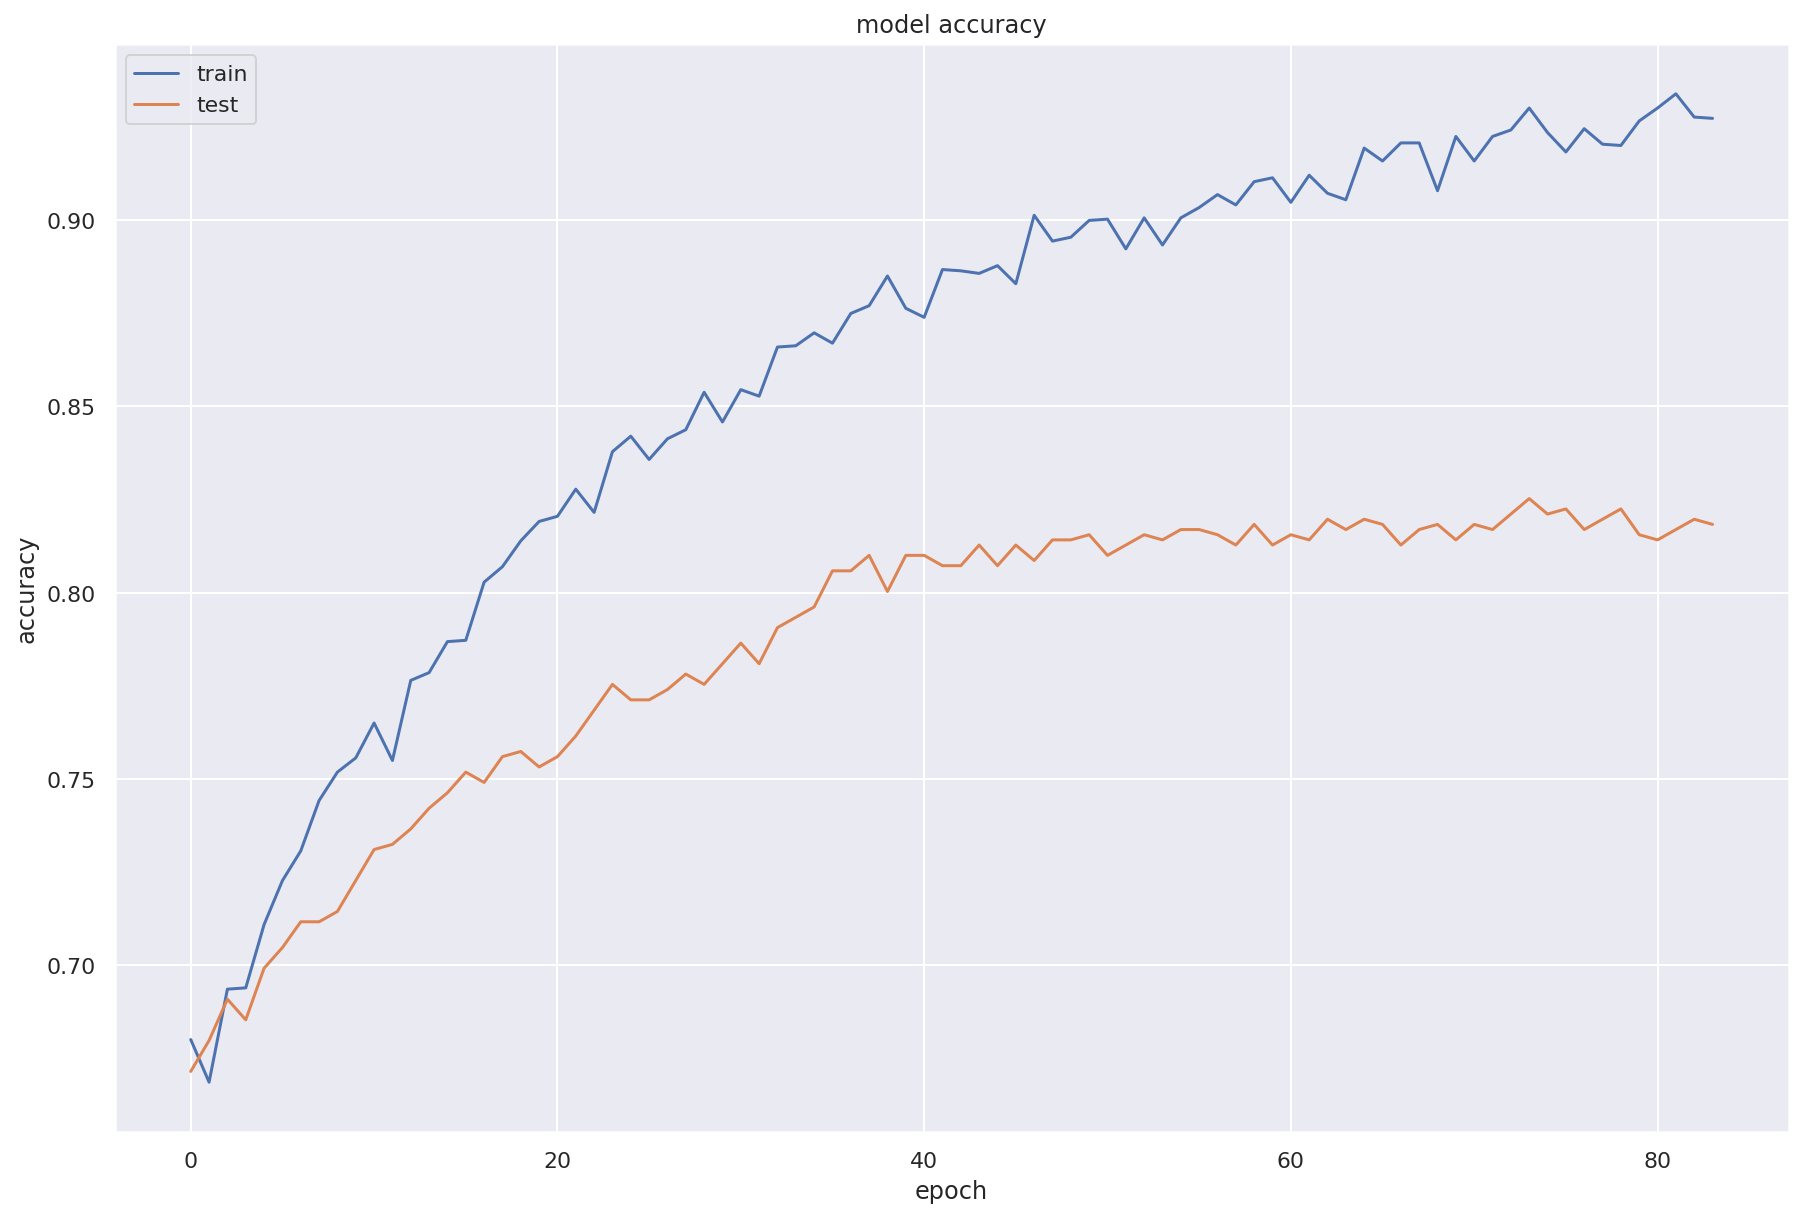

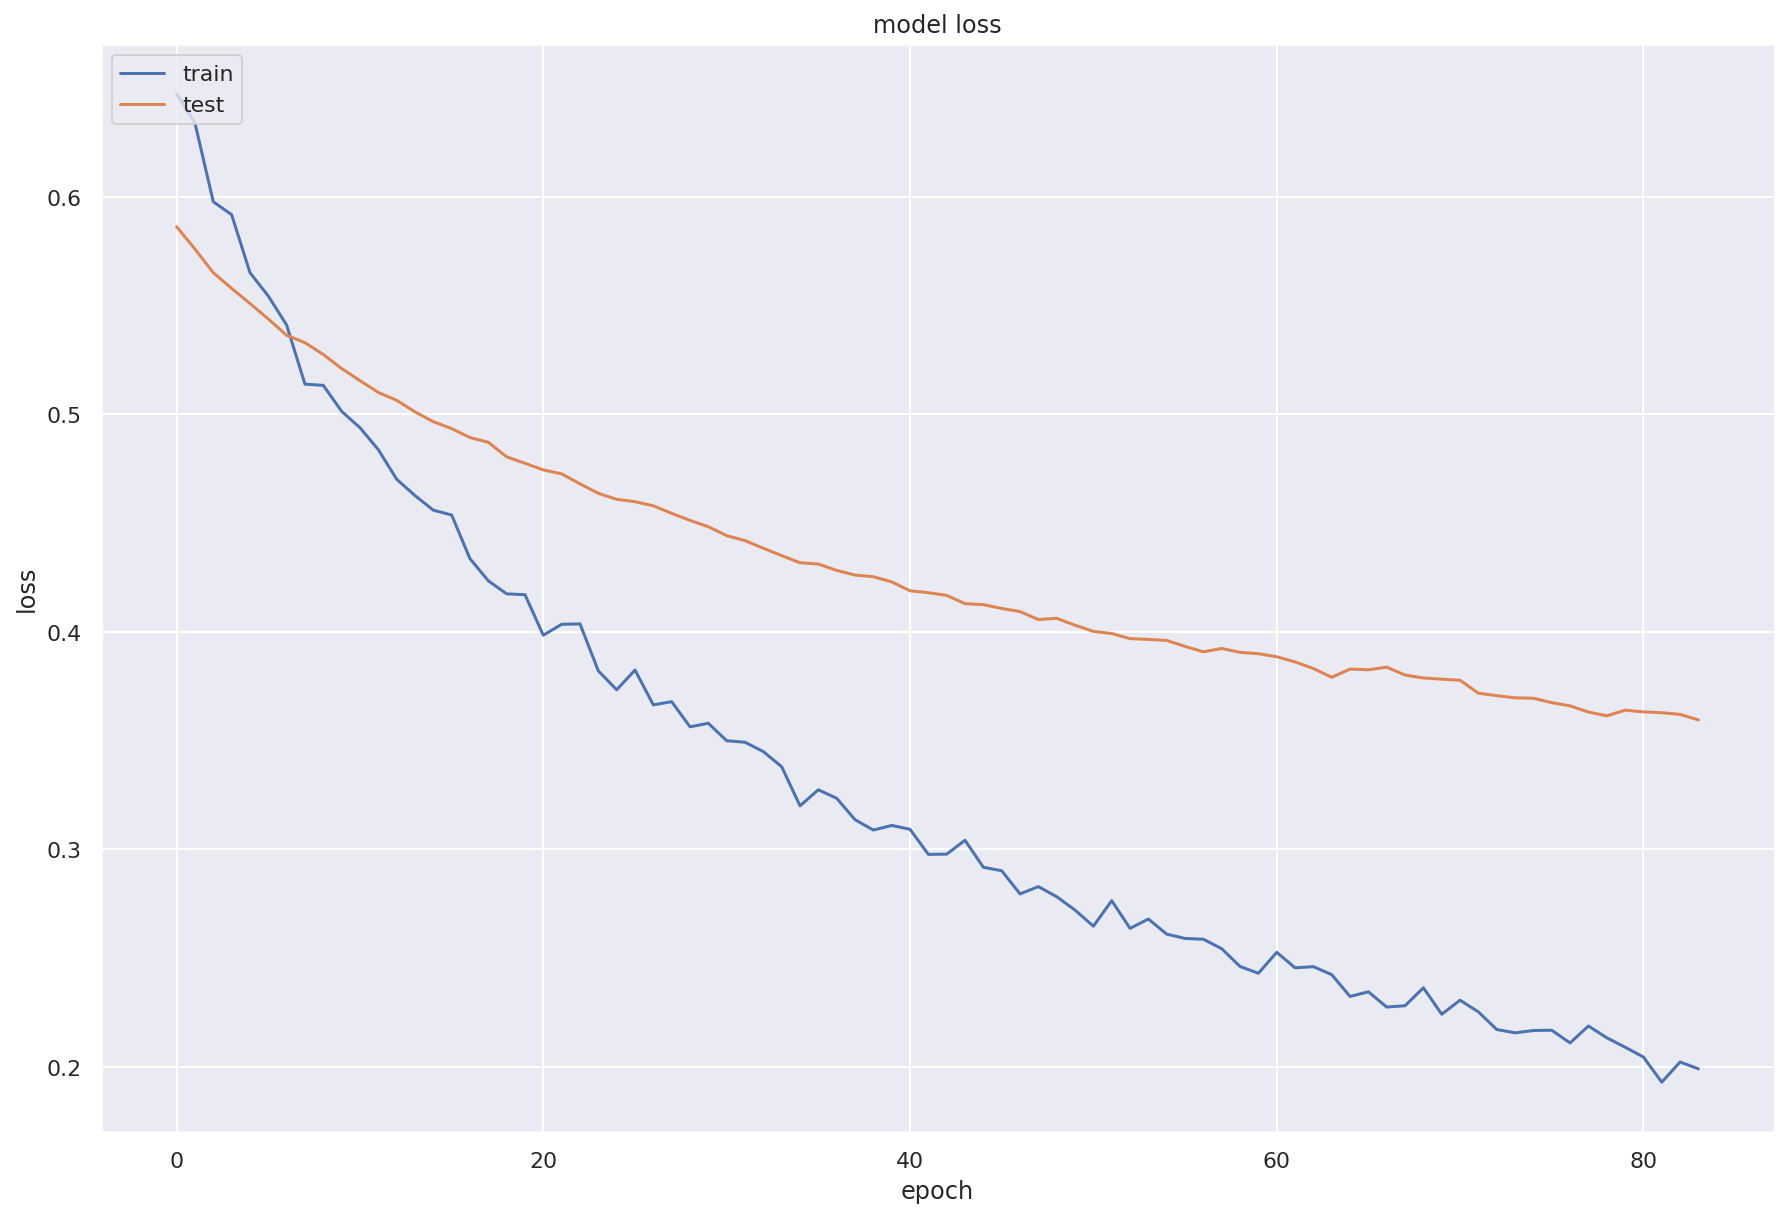

In [15]:
print(history.history.keys())

plt.figure(figsize=(15,10))

# summarize history for accuracy
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.figure(figsize=(15,10))
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left');

### Comments on the plots

We can clearly state the model is slightly overfitting. This suggests to take some actions in order to reduce such issue.
One can simplify the model, increase the dropout rates, regularise a bit more, etc.

**Exercise**: Perform such optimisation in order to avoid overfitting.

### Model evaluation

In [16]:
model.evaluate(x_test, y_test, verbose=1)

42/42 [==============================] - 3s 75ms/step - loss: 0.3805 - sparse_categorical_accuracy: 0.8341


[0.38051778078079224, 0.8340908885002136]

## Some observations

In about $110$-$120$ epochs (~$25$s each on Colab with enabled GPU), the model reaches a training accuracy of ~$0.95$, validation accuracy of ~$0.84$ and a testing accuracy of ~$0.85$, without hyperparameter tuning. And that is for a model with less than $100$k parameters. Of course, parameter count and accuracy could be improved by a hyperparameter search and a more sophisticated learning rate schedule, or a different optimizer.

---

## Exercises 

1. Perform hyperparameter finetuning (you can use  a tool like the holy spirit, grid search or a framework like [optuna](https://optuna.org) if you like).

2. Implement the same model using an LSTM based architecture and compare results.

3. Apply the transformer architecture to a time series forecast problem

---

# Conclusion

The final model shows very good results on the data-set, this would outperform an implementation based on LSTM, which would suffer from short-term memory. Moreover, the architecture allows for much more rapid training, as the computations during training are done concurrently rather than sequentially. 

It can be concluded that the Transformer architecture, which is traditionally applied to NLP problems, has large potential in time series forecasting.

## Other libraries to look at

1. [flow-forecast](https://github.com/AIStream-Peelout/flow-forecast)
2. [darts](https://unit8co.github.io/darts/)
3. [neural-prophet](https://neuralprophet.com/)